In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load the data
df=pd.read_csv('kc_house_data.csv')

In [3]:
# first five rows
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7      1180.0   
1      7242     2.0           0     0     ...          7      2170.0   
2     10000     1.0           0     0     ...          6       770.0   
3      5000     1.0           0     0     ...          7      1050.0   
4      8080     1.0           0     0     ...          8      1680.0   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
df.columns # check the columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# based on yr_built we can calculate the age of the building 
# the nearest year from the date column is 2015
df['building_age']=[2015-i for i in df.yr_built]

In [6]:
# basement distribution
sns.distplot(df.sqft_basement)

In [7]:
# create dummy variavle for sqft_basement column
dummy_basement=[]
for i in df.sqft_basement:
    if i!=0:
        dummy_basement.append(1)
    else:
        dummy_basement.append(i)
# if a house has a basement then the value will be 1 else the value is 0
df['dummy_basement']= dummy_basement    
df['dummy_basement'].value_counts()

0    13126
1     8487
Name: dummy_basement, dtype: int64

In [12]:
# zipcode is also important because the house location also affect housing price
# #!pip install uszipcode #install the uszipcode first 
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)
cities=[]
for zipcode in df.zipcode:
    city=search.by_zipcode("{}".format(zipcode)).major_city
    cities.append(city)

In [13]:
#based on the zipcode, we obtianed the column of cities
df['city']=cities

In [11]:
#select features
features=['price', 'bedrooms', 'sqft_living','dummy_basement',
          'condition', 'grade', 'building_age','city']
len(features)

8

# Distribution of features

In [12]:
# plot features distribution 
plt.figure(figsize=(10,15))
for i in range(0,7):
    plt.subplot(4,2,i+1)
    sns.distplot(df[features[i]])
    plt.title("Distribution of {}".format(features[i]),fontsize=15)
    plt.tight_layout() 

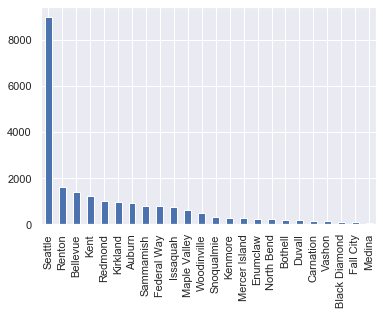

In [13]:
# distribution of city column
df.city.value_counts().plot(kind='bar')

# Outliers removal

In [14]:
# create a function to remove outliers 
def outlier_removal(df,col,quantile):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.title('Distribution Before Outlier Removal')
    plt.subplot(1,2,2)
    df_new=df[df[col]<df[col].quantile(quantile)]
    sns.distplot(df_new[col])
    plt.title('Distribution After Outlier Removal')

    plt.tight_layout()
    return df_new

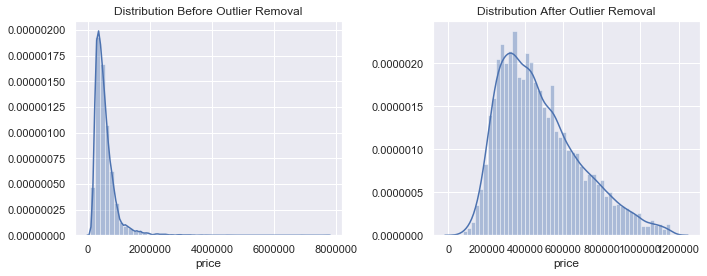

In [15]:
# price 
df_1=outlier_removal(df,'price',0.95)

In [16]:
# Bedroom Numbers
df_2=outlier_removal(df_1,'bedrooms',0.99)

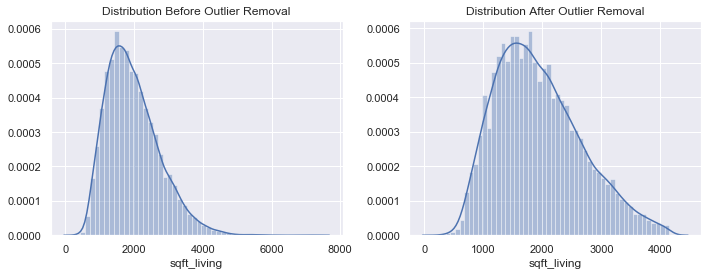

In [17]:
# sqft_living
df_3=outlier_removal(df_2,'sqft_living',0.99)

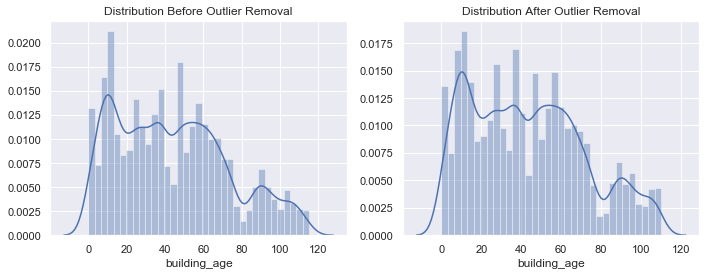

In [18]:
# sqft_living
df_or=outlier_removal(df_3,'building_age',0.99)

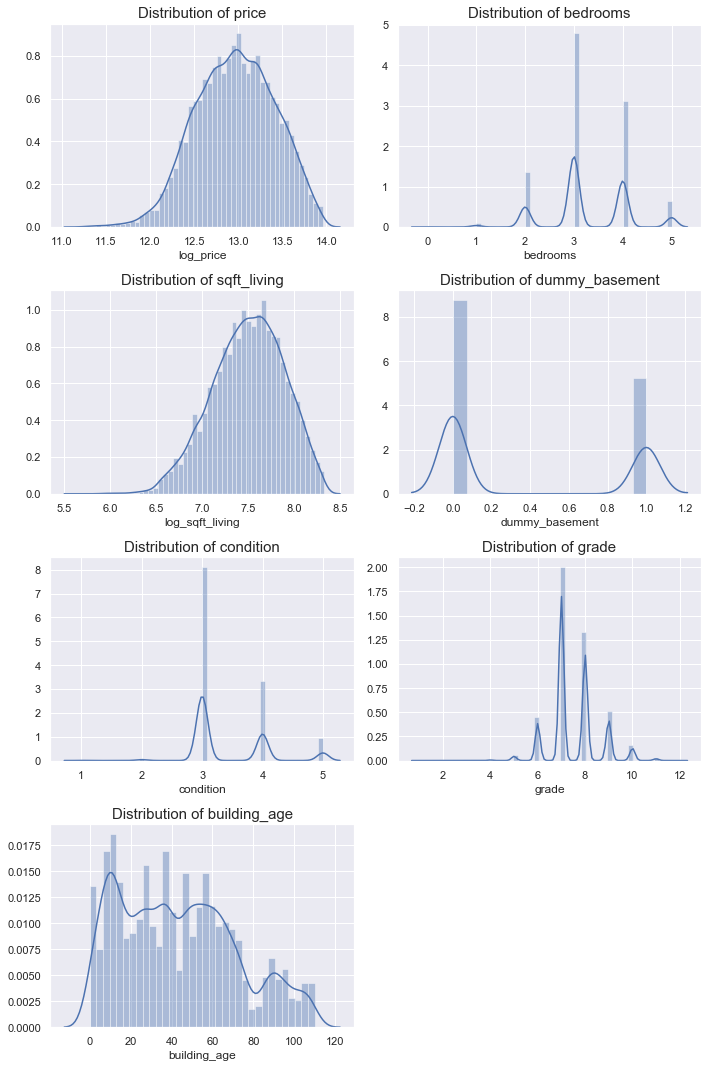

In [27]:
# check the distribution again after data transformation
import warnings
warnings.filterwarnings("ignore")
# create new columns - log_sqrt_living and log_price
df_or['log_sqft_living']=np.log(df_or.sqft_living)
df_or['log_price']=np.log(df_or.price)

feature_list=['log_price', 'bedrooms', 'log_sqft_living', 'dummy_basement', 'condition', 'grade', 'building_age', 'city']

# plot features distribution 
plt.figure(figsize=(10,15))
for i in range(0,7):
    plt.subplot(4,2,i+1)
    sns.distplot(df_or[feature_list[i]])
    plt.title("Distribution of {}".format(features[i]),fontsize=15)
    plt.tight_layout()

# Linearity and Homoskedasticity

In [28]:
# a function to generate scatter plots - before transformation and after transformation
def scatter_plot(x,y,t_x,t_y,title): 
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.scatter(x,y)
    plt.title('{} - Linearity Before Transformation'.format(title))
    plt.subplot(1,2,2)
    plt.scatter(t_x,t_y)
    plt.title('{} - Linearity After Transformation'.format(title))
    plt.tight_layout()

In [29]:
# check lineartiy between the none-dummy variables and Price 

## Price VS Bedrooms

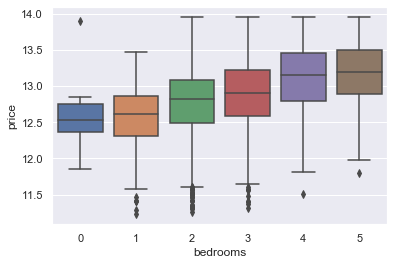

In [30]:
sns.boxplot(df_or['bedrooms'], y=np.log(df_or['price']))

## Price VS sqft_living

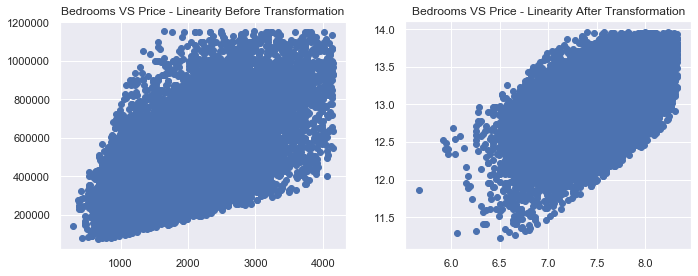

In [31]:
scatter_plot(df_or['sqft_living'],df_or['price'],
             np.log(df_or['sqft_living']),np.log(df_or['price']),
            "Bedrooms VS Price")

## basement VS price


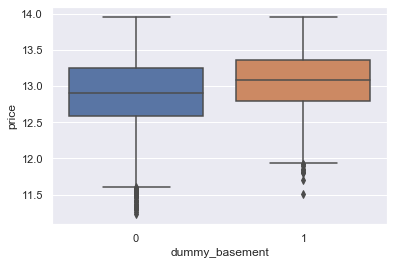

In [437]:
# box plot the  price mean of the houses without basements is smaller than the price mean of
# these houses with basements 
sns.boxplot(df_or['dummy_basement'], y=np.log(df_or['price']))

## condition vs price 

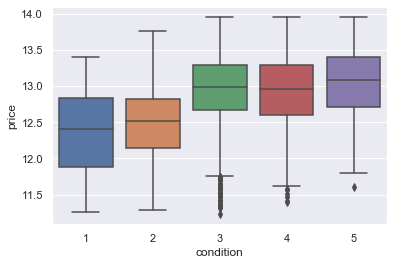

In [438]:
# we can see that if the scores of the condition increases, 
#the mean of the price also increases.
sns.boxplot(df_or['condition'], y=np.log(df_or['price']))

## Grade vs Price


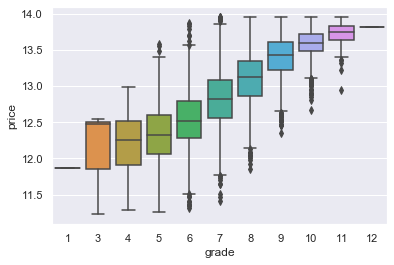

In [439]:
sns.boxplot(df_or['grade'], y=np.log(df_or['price']))

## building_age VS price

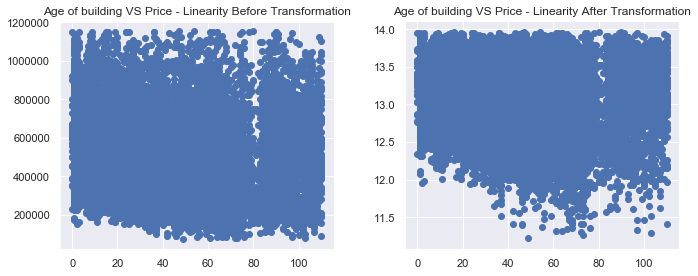

In [440]:
 scatter_plot(df_or['building_age'],df_or['price'],
             (df_or['building_age']),np.log(df_or['price']),
            "Age of building VS Price")

## cities vs price 

In [441]:
geo_df=df_or[['price','city','lat','long']].groupby(['city'])['price','lat','long'].mean().reset_index()
geo_df.head()

/Users/yingyuxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


city          price        lat        long
0         Auburn  287115.150224  47.306281 -122.219093
1       Bellevue  676262.359852  47.592499 -122.150343
2  Black Diamond  421316.842105  47.333740 -121.998989
3        Bothell  483996.751323  47.755349 -122.200862
4      Carnation  422241.850000  47.672539 -121.846283

In [442]:
# import geo pandas
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [464]:

path='/Users/yingyuxuan/Desktop/projects/Multiple Linear Regression with Dummy Variable/'
shp_df=gpd.read_file(path+'kc-shp')

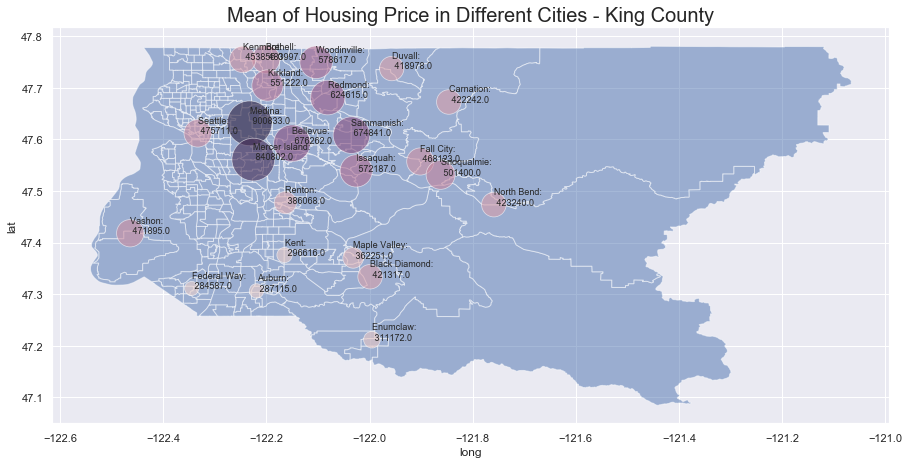

In [444]:
shp_df.plot(figsize=(15, 10),alpha=0.5)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(geo_df.long,geo_df.lat,alpha=0.6,
                size=geo_df.price,hue=geo_df.price
               ,sizes=(200, 2000),
                    legend=None )

for i in range(len(geo_df)):
    plt.text(geo_df.long[i],geo_df.lat[i],'{}: \n {}'.format(geo_df.city[i],round(geo_df.price[i])),fontsize=9)
    
plt.title('Mean of Housing Price in Different Cities - King County',fontsize=20)
plt.show()

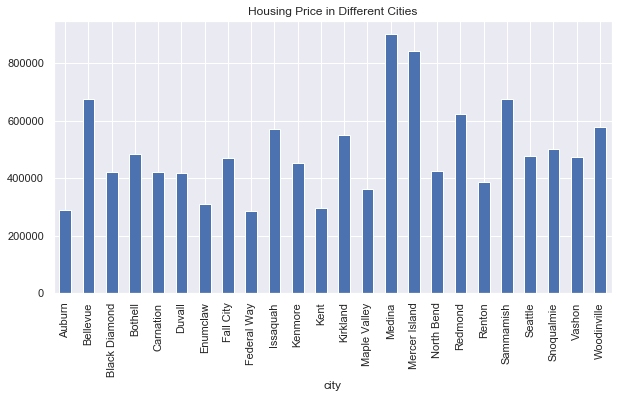

In [445]:
geo_df.groupby('city')['price'].mean().plot(kind='bar',
                                            title='Housing Price in Different Cities',
                                           figsize=(10,5))

# Add transformed columns

In [447]:
print(features)

['price', 'bedrooms', 'sqft_living', 'dummy_basement', 'condition', 'grade', 'building_age', 'city']


# Feature Selection


In [448]:
# create dummies for city column
dummies=pd.get_dummies(df_or.city,drop_first=True)
new_df=df_or[[ 'log_price','bedrooms', 'log_sqft_living', 'dummy_basement', 'condition', 'grade', 'building_age']].merge(dummies,left_index=True,right_index=True)


In [449]:
# declare independent and dependent variables
inputs=new_df.drop(columns='log_price')
target=new_df.log_price

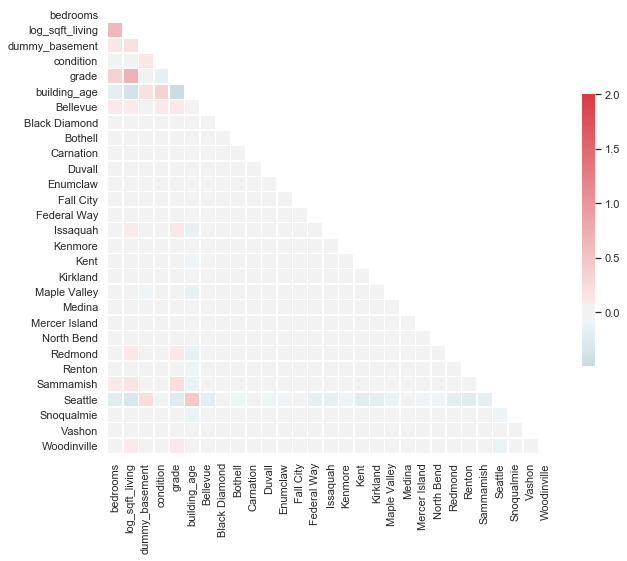

In [450]:
sns.set(style="white")


# Compute the correlation matrix
corr = inputs.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

# Linear Regresson

In [451]:
# import package
from sklearn.linear_model import LinearRegression

In [452]:
# fit the model 
reg = LinearRegression()
reg.fit(inputs,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [453]:
# r_squared
reg.score(inputs,target)

0.7003772859413339

In [454]:
# coefficient
reg.coef_

array([-0.03285019,  0.48098517,  0.00238275,  0.04963766,  0.1703401 ,
        0.00226802,  0.65705815,  0.29839411,  0.42292833,  0.35886143,
        0.35648688,  0.10475065,  0.4720071 , -0.04013537,  0.5211466 ,
        0.38984767,  0.04697071,  0.59166372,  0.19392439,  1.21159424,
        0.78787346,  0.35430441,  0.59976815,  0.23463783,  0.5318156 ,
        0.49299409,  0.44897309,  0.48076141,  0.45629735])

In [455]:
#intercept
reg.intercept_

7.5157925304218445

In [456]:
# since we transformed data then let us transfom it back 
# prediction
prediction=reg.predict(inputs)


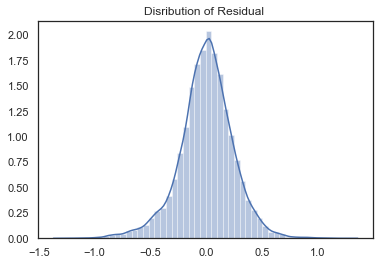

In [457]:
# plot predicted values and Actual values
sns.distplot(target-prediction)
plt.title('Disribution of Residual ')
plt.xlabel(' ')
plt.show()

In [458]:
reg_summary = pd.DataFrame(x_train.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary


Features   Weights
0          bedrooms -0.032850
1   log_sqft_living  0.480985
2    dummy_basement  0.002383
3         condition  0.049638
4             grade  0.170340
5      building_age  0.002268
6          Bellevue  0.657058
7     Black Diamond  0.298394
8           Bothell  0.422928
9         Carnation  0.358861
10           Duvall  0.356487
11         Enumclaw  0.104751
12        Fall City  0.472007
13      Federal Way -0.040135
14         Issaquah  0.521147
15          Kenmore  0.389848
16             Kent  0.046971
17         Kirkland  0.591664
18     Maple Valley  0.193924
19           Medina  1.211594
20    Mercer Island  0.787873
21       North Bend  0.354304
22          Redmond  0.599768
23           Renton  0.234638
24        Sammamish  0.531816
25          Seattle  0.492994
26       Snoqualmie  0.448973
27           Vashon  0.480761
28      Woodinville  0.456297

In [459]:
actual=np.exp(target)
predicted_values=np.exp(prediction)

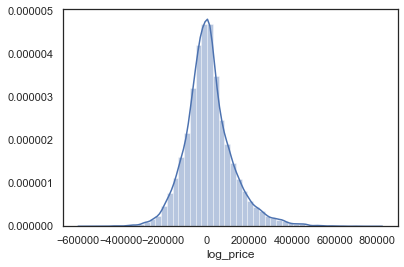

In [462]:
sns.distplot(actual-predicted_values)